### Text Classifier Using Naive Bayes

##### Importing necessary Libraries

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = data.target_names
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [15]:
print(train.data[5])
len(train.data)

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

11314

##### Training Model

In [16]:
#Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [17]:
# Creating and training the model
model =  make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

>  The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow us to encode new 
documents. The data from TfidfVectorizer will pass to  MultinomialNB







In [19]:
#creating labels for test data
labels = model.predict(test.data)

#####  Confusion matrix and heat map

Text(91.67999999999999, 0.5, 'Predicted label')

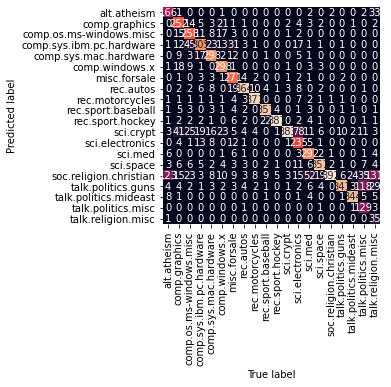

In [25]:
# creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat= confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False , xticklabels= train.target_names
            ,yticklabels=train.target_names)
plt.xlabel("True label")
plt.ylabel("Predicted label")

From the above heatmap, it can be observed that we might have missed on some categories like talk.religion.misc vs talk.politics.misc which is represented by red spots, but overall model prediction is well.

##### Predicting category of new data

In [28]:
# Predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
  pred=model.predict([s])
  print(pred)
  return train.target_names[pred[0]]

In [29]:
predict_category('Jesus Christ')

[15]


'soc.religion.christian'

In [30]:
predict_category("Sending load to international Space Station")

[14]


'sci.space'

In [31]:
predict_category("President of India")

[18]


'talk.politics.misc'

In [32]:
predict_category("Suzuki Hayabusa is a very fast motorcycle")

[8]


'rec.motorcycles'